In [1]:
#https://blog.keras.io/building-autoencoders-in-keras.html

In [2]:
from __future__ import division, print_function
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Reshape, UpSampling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras import backend as K
from keras.applications import vgg16
from keras.layers import Input, merge
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dense, Dropout, Flatten, Lambda
from keras.models import Sequential, Model
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise
from random import shuffle
from scipy.misc import imresize
import itertools
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, TensorBoard
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise
from keras import optimizers
import os
from PIL import Image
from numpy import dot
from numpy.linalg import norm
import glob    
import pandas as pd
%matplotlib inline
import pickle
import cv2

Using TensorFlow backend.


In [3]:
seenTr=pd.read_csv('dataset_shuffled_training_siamese.csv')
seenVal=pd.read_csv('dataset_shuffled_validation_siamese.csv')
data_seen_dir = ("D:/ML/shuffled-dataset/")
images_seen_traning_dir = os.path.join(data_seen_dir, "TrainingSet/")
print(images_seen_traning_dir)
images_seen_validation_dir = os.path.join(data_seen_dir, "ValidationSet/")
print(images_seen_validation_dir)

D:/ML/shuffled-dataset/TrainingSet/
D:/ML/shuffled-dataset/ValidationSet/


In [4]:
# this is the size of our encoded representations
encoding_dim = 64  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(4096,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(4096, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
encoder = Model(input_img, encoded)

In [6]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [8]:
def datagen(path):
    image_list = []
    file=[]
    for filename in glob.glob(path+'/*.png'): #assuming gif
        im=cv2.imread(filename,0)
        image_list.append(im)
        x = filename.split('\\')        
        file.append(x[-1])
    return image_list,file

In [9]:
training_image, training_img_name = datagen(images_seen_traning_dir)
training_image = np.asarray(training_image)
x_train = training_image
validation_image, validation_img_name = datagen(images_seen_validation_dir)
validation_image = np.asarray(validation_image)
x_test = validation_image

In [32]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
pval=0.961
print (x_train.shape)
print (x_test.shape)

(11823, 4096)
(1971, 4096)


In [11]:
history=autoencoder.fit(x_train, x_train,
                epochs=500,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 11823 samples, validate on 1971 samples
Epoch 1/500
11823/11823 [==============================] - 4s 367us/step - loss: 0.3439 - val_loss: 0.1987
Epoch 2/500
11823/11823 [==============================] - 2s 210us/step - loss: 0.1711 - val_loss: 0.1962
Epoch 3/500
11823/11823 [==============================] - 3s 224us/step - loss: 0.1703 - val_loss: 0.1954
Epoch 4/500
11823/11823 [==============================] - 2s 210us/step - loss: 0.1701 - val_loss: 0.1963
Epoch 5/500
11823/11823 [==============================] - 3s 215us/step - loss: 0.1699 - val_loss: 0.1966
Epoch 6/500
11823/11823 [==============================] - 2s 211us/step - loss: 0.1699 - val_loss: 0.1965
Epoch 7/500
11823/11823 [==============================] - 2s 210us/step - loss: 0.1698 - val_loss: 0.1955
Epoch 8/500
11823/11823 [==============================] - 3s 213us/step - loss: 0.1697 - val_loss: 0.1950
Epoch 9/500
11823/11823 [======================

Epoch 74/500
11823/11823 [==============================] - 3s 240us/step - loss: 0.1536 - val_loss: 0.1795
Epoch 75/500
11823/11823 [==============================] - 2s 203us/step - loss: 0.1533 - val_loss: 0.1793
Epoch 76/500
11823/11823 [==============================] - 2s 205us/step - loss: 0.1531 - val_loss: 0.1791
Epoch 77/500
11823/11823 [==============================] - 2s 203us/step - loss: 0.1529 - val_loss: 0.1789
Epoch 78/500
11823/11823 [==============================] - 2s 203us/step - loss: 0.1526 - val_loss: 0.1789
Epoch 79/500
11823/11823 [==============================] - 2s 202us/step - loss: 0.1524 - val_loss: 0.1781
Epoch 80/500
11823/11823 [==============================] - 2s 211us/step - loss: 0.1522 - val_loss: 0.1781
Epoch 81/500
11823/11823 [==============================] - 3s 218us/step - loss: 0.1520 - val_loss: 0.1775
Epoch 82/500
11823/11823 [==============================] - 3s 219us/step - loss: 0.1518 - val_loss: 0.1778
Epoch 83/500
11823/11823 [==

11823/11823 [==============================] - 2s 201us/step - loss: 0.1412 - val_loss: 0.1659
Epoch 150/500
11823/11823 [==============================] - 2s 203us/step - loss: 0.1410 - val_loss: 0.1658
Epoch 151/500
11823/11823 [==============================] - 2s 202us/step - loss: 0.1409 - val_loss: 0.1657
Epoch 152/500
11823/11823 [==============================] - 2s 201us/step - loss: 0.1408 - val_loss: 0.1656
Epoch 153/500
11823/11823 [==============================] - 2s 202us/step - loss: 0.1407 - val_loss: 0.1654
Epoch 154/500
11823/11823 [==============================] - 2s 206us/step - loss: 0.1405 - val_loss: 0.1653
Epoch 155/500
11823/11823 [==============================] - 2s 203us/step - loss: 0.1404 - val_loss: 0.1649
Epoch 156/500
11823/11823 [==============================] - 2s 201us/step - loss: 0.1403 - val_loss: 0.1648
Epoch 157/500
11823/11823 [==============================] - 2s 201us/step - loss: 0.1402 - val_loss: 0.1650
Epoch 158/500
11823/11823 [======

11823/11823 [==============================] - 2s 206us/step - loss: 0.1325 - val_loss: 0.1556
Epoch 225/500
11823/11823 [==============================] - 2s 207us/step - loss: 0.1324 - val_loss: 0.1555
Epoch 226/500
11823/11823 [==============================] - 2s 207us/step - loss: 0.1323 - val_loss: 0.1554
Epoch 227/500
11823/11823 [==============================] - 2s 209us/step - loss: 0.1322 - val_loss: 0.1552
Epoch 228/500
11823/11823 [==============================] - 3s 222us/step - loss: 0.1321 - val_loss: 0.1551
Epoch 229/500
11823/11823 [==============================] - 3s 225us/step - loss: 0.1320 - val_loss: 0.1549
Epoch 230/500
11823/11823 [==============================] - 3s 221us/step - loss: 0.1319 - val_loss: 0.1549
Epoch 231/500
11823/11823 [==============================] - 3s 213us/step - loss: 0.1318 - val_loss: 0.1548
Epoch 232/500
11823/11823 [==============================] - 2s 208us/step - loss: 0.1317 - val_loss: 0.1547
Epoch 233/500
11823/11823 [======

11823/11823 [==============================] - 3s 226us/step - loss: 0.1263 - val_loss: 0.1482
Epoch 300/500
11823/11823 [==============================] - 2s 210us/step - loss: 0.1262 - val_loss: 0.1482
Epoch 301/500
11823/11823 [==============================] - 3s 215us/step - loss: 0.1262 - val_loss: 0.1481
Epoch 302/500
11823/11823 [==============================] - 2s 205us/step - loss: 0.1261 - val_loss: 0.1480
Epoch 303/500
11823/11823 [==============================] - 2s 205us/step - loss: 0.1260 - val_loss: 0.1478
Epoch 304/500
11823/11823 [==============================] - 2s 202us/step - loss: 0.1259 - val_loss: 0.1477
Epoch 305/500
11823/11823 [==============================] - 3s 217us/step - loss: 0.1259 - val_loss: 0.1477
Epoch 306/500
11823/11823 [==============================] - 2s 202us/step - loss: 0.1258 - val_loss: 0.1478
Epoch 307/500
11823/11823 [==============================] - 2s 207us/step - loss: 0.1257 - val_loss: 0.1476
Epoch 308/500
11823/11823 [======

11823/11823 [==============================] - 2s 205us/step - loss: 0.1218 - val_loss: 0.1430
Epoch 375/500
11823/11823 [==============================] - 3s 217us/step - loss: 0.1218 - val_loss: 0.1429
Epoch 376/500
11823/11823 [==============================] - 3s 211us/step - loss: 0.1217 - val_loss: 0.1429
Epoch 377/500
11823/11823 [==============================] - 3s 223us/step - loss: 0.1217 - val_loss: 0.1430
Epoch 378/500
11823/11823 [==============================] - 2s 207us/step - loss: 0.1216 - val_loss: 0.1427
Epoch 379/500
11823/11823 [==============================] - 3s 226us/step - loss: 0.1216 - val_loss: 0.1428
Epoch 380/500
11823/11823 [==============================] - 2s 207us/step - loss: 0.1215 - val_loss: 0.1427
Epoch 381/500
11823/11823 [==============================] - 2s 210us/step - loss: 0.1215 - val_loss: 0.1425
Epoch 382/500
11823/11823 [==============================] - 2s 211us/step - loss: 0.1214 - val_loss: 0.1425
Epoch 383/500
11823/11823 [======

11823/11823 [==============================] - 3s 212us/step - loss: 0.1186 - val_loss: 0.1392
Epoch 450/500
11823/11823 [==============================] - 3s 212us/step - loss: 0.1186 - val_loss: 0.1393
Epoch 451/500
11823/11823 [==============================] - 2s 211us/step - loss: 0.1185 - val_loss: 0.1392
Epoch 452/500
11823/11823 [==============================] - 3s 221us/step - loss: 0.1185 - val_loss: 0.1392
Epoch 453/500
11823/11823 [==============================] - 3s 229us/step - loss: 0.1185 - val_loss: 0.1391
Epoch 454/500
11823/11823 [==============================] - 2s 210us/step - loss: 0.1184 - val_loss: 0.1390
Epoch 455/500
11823/11823 [==============================] - 3s 219us/step - loss: 0.1184 - val_loss: 0.1390
Epoch 456/500
11823/11823 [==============================] - 2s 211us/step - loss: 0.1184 - val_loss: 0.1390
Epoch 457/500
11823/11823 [==============================] - 2s 200us/step - loss: 0.1183 - val_loss: 0.1389
Epoch 458/500
11823/11823 [======

In [12]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B51083F28>,
      dtype=object)

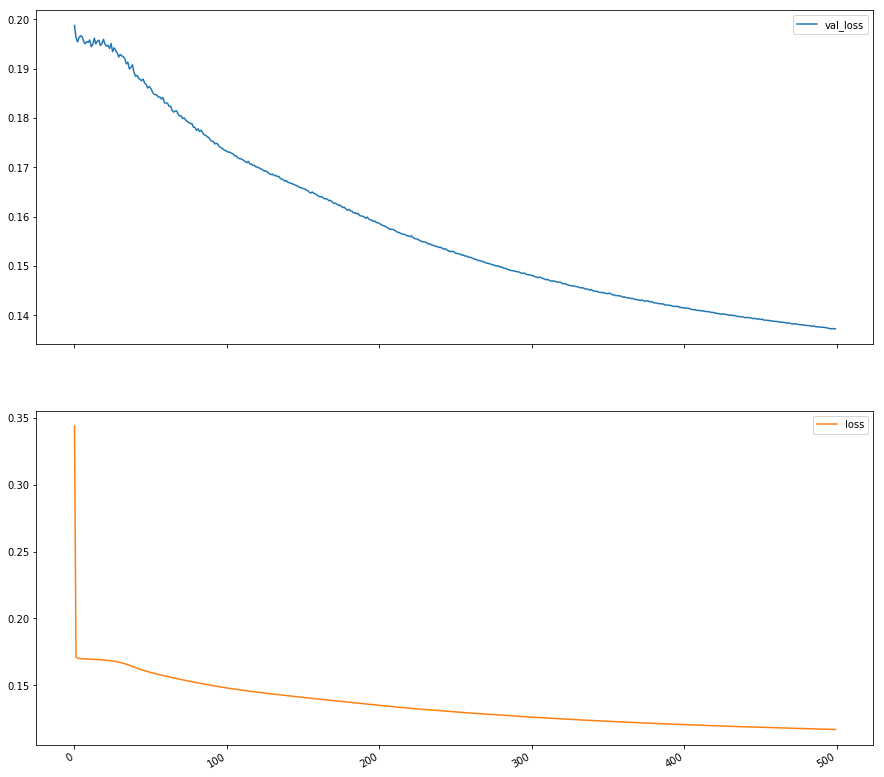

In [13]:
df_hist = pd.DataFrame(history.history)
df_hist.plot(subplots=True, figsize=(15,15))

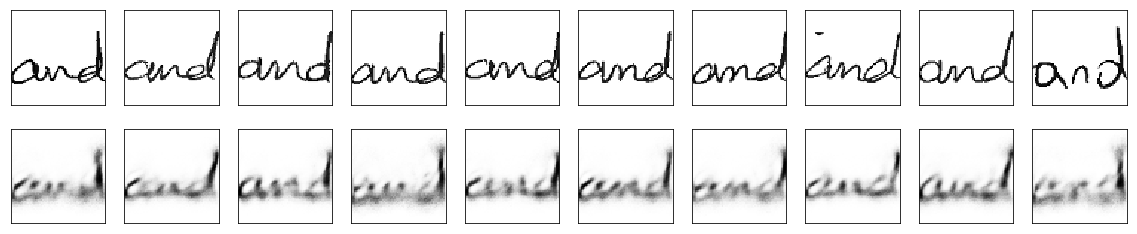

In [14]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
def cos_sim(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return (dot_product / (norm_a * norm_b))

In [33]:
#print(training_img_name)
df = pd.read_csv('dataset_shuffled_validation_siamese.csv')
orgLabels=df.iloc[:,3:4].values.tolist()
target=[]
for i in range(0,len(orgLabels)):
    target.append(orgLabels[i][0])
#print(target)
left_name = df.iloc[:,1:2].values.tolist()
right_name = df.iloc[:,2:3].values.tolist()
final = list(zip(left_name, right_name))
predict=[]
target_final = []

labelsNew=[]
for i in range(0,len(final)):
    i1,i2 = final[i]
    #print(type(i1))
    #print(i1,i2)
    x=''.join(i1)
    y=''.join(i2)
    if(x[:4]==y[:4]):
        target_final.append(1)
    else:
        target_final.append(0)
    #if((''.join(i1)) in training_img_name and (''.join(i2)) in training_img_name):
    idx_i1 = validation_img_name.index(''.join(i1))
    idx_i2 = validation_img_name.index(''.join(i2))
    #print(idx_i1)
    th=cos_sim(encoded_imgs[idx_i1],encoded_imgs[idx_i2])

    #print(th)

    if(th>pval):
        predict.append(1)
    else:
        predict.append(0)

In [34]:
c=0
#print(predict)
for i in range(0,len(final)):
    if(predict[i]==target[i]):
        c+=1
print("Accuracy is {}".format(c/len(final)))

Accuracy is 0.742624810892587
